#**BA 875 Operations and Supply Chain Analytics**

Homework Assignment 4

By, Prateek Naharia | nahariap@bu.edu

##Part I: Inventory & Capacity Planning | Hyatt’s Problem 
(Overbooking level optimization)

Dataset: none needed (building simulation)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# input parameters
capacity = 100
room_price = 150
voucher = 25
no_show_mean = 8
no_show_sd = 2
simulation_run = 5000

<Axes: ylabel='Frequency'>

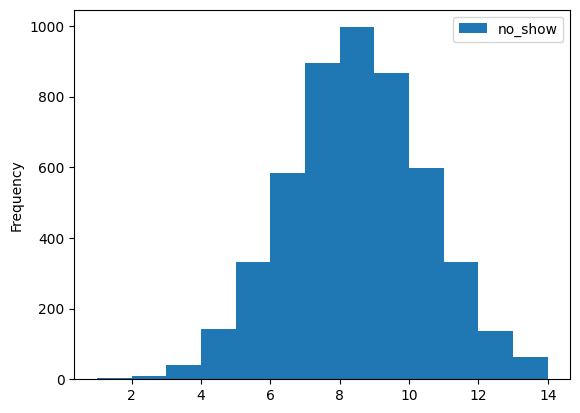

In [4]:
# simulate the number of noshows
df_no_show = pd.DataFrame({'no_show' : np.random.normal(no_show_mean,no_show_sd,simulation_run).round()})
df_no_show.plot.hist(bins=range(1, 15))

In [6]:
# as a rule of thumb, try the overbooking number between
# mean - 3SD, mean + 3SD
df_optimize = pd.DataFrame({'overbook_level' : np.arange(2,15)})

In [7]:
# use a loop to try different order levels and compute average profit
for i in np.arange(0,df_optimize.shape[0]):
    df_no_show['overbook_level'] = df_optimize.overbook_level[i]
    df_no_show['net_rooms'] = (capacity + df_optimize.overbook_level[i] - df_no_show.no_show).clip(upper=capacity)
    df_no_show['room_rev'] = df_no_show['net_rooms']*room_price
    df_no_show['denials'] = (df_optimize.overbook_level[i] - df_no_show.no_show).clip(lower=0)
    df_no_show['denial_cost'] = df_no_show['denials']*voucher
    # If calculated revenue at 100 capacity, instead of 'net_rooms', need to account separately for opportunity cost
    df_no_show['empty rooms'] = (df_no_show.no_show - df_optimize.overbook_level[i]).clip(lower=0)
    df_no_show['opportunity cost'] =  df_no_show['empty rooms']*room_price
    df_no_show['profit'] = df_no_show['room_rev'] - df_no_show['denial_cost'] - df_no_show['opportunity cost']
    df_optimize.loc[i,'avg_profit'] = df_no_show.profit.mean()
    df_optimize.loc[i,'sd_profit'] = df_no_show.profit.std()

In [8]:
# verify intermediate calculations done as expected     
df_no_show.sort_values('profit')

,no_show,overbook_level,net_rooms,room_rev,denials,denial_cost,empty rooms,opportunity cost,profit
3423,1.0,14,100.0,15000.0,13.0,325.0,0.0,0.0,14675.0
4467,1.0,14,100.0,15000.0,13.0,325.0,0.0,0.0,14675.0
674,1.0,14,100.0,15000.0,13.0,325.0,0.0,0.0,14675.0
3124,15.0,14,99.0,14850.0,0.0,0.0,1.0,150.0,14700.0
2338,2.0,14,100.0,15000.0,12.0,300.0,0.0,0.0,14700.0
...,...,...,...,...,...,...,...,...,...
594,14.0,14,100.0,15000.0,0.0,0.0,0.0,0.0,15000.0
83,14.0,14,100.0,15000.0,0.0,0.0,0.0,0.0,15000.0
792,14.0,14,100.0,15000.0,0.0,0.0,0.0,0.0,15000.0
508,14.0,14,100.0,15000.0,0.0,0.0,0.0,0.0,15000.0


In [9]:
# verify that avg_profit, sd_profit calculated and stored as expected
df_optimize.sort_values("avg_profit", ascending=False)

,overbook_level,avg_profit,sd_profit
9,11,14905.950,95.060006
8,10,14896.175,155.479353
10,12,14894.210,63.877163
11,13,14873.565,52.639053
12,14,14849.930,50.435641
7,9,14847.595,244.641699
6,8,14742.725,349.591036
5,7,14573.115,449.429048
4,6,14345.395,525.154336
3,5,14079.715,572.825034


<Axes: xlabel='overbook_level', ylabel='sd_profit'>

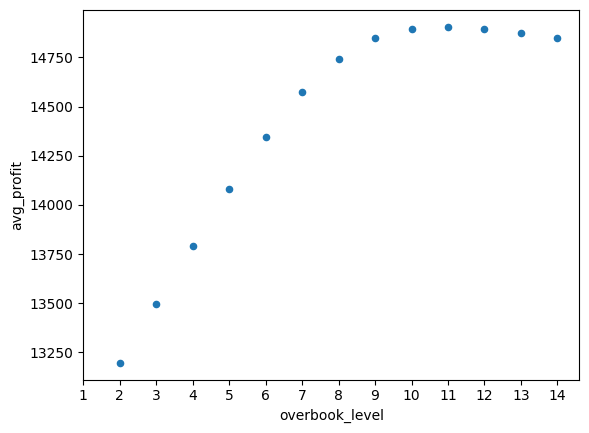

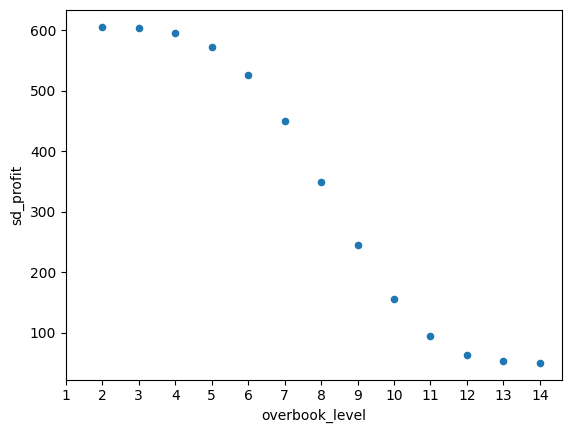

In [10]:
# relationship between avg and sd of profit with order level
df_optimize.plot.scatter(x='overbook_level',y='avg_profit',xticks=range(1, 15))
df_optimize.plot.scatter(x='overbook_level',y='sd_profit',xticks=range(1, 15))


[Text(0, 0.5, 'Expected Profit (avg_profit)'),
 Text(0.5, 0, 'Uncertainty (sd_profit)')]

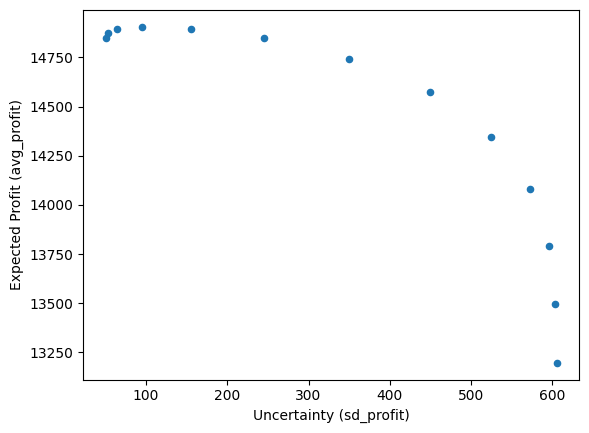

In [11]:
# profit risk: efficiency frontier
df_optimize.plot.scatter(y='avg_profit',x='sd_profit').set(ylabel="Expected Profit (avg_profit)", xlabel="Uncertainty (sd_profit)")

##Part II: Inventory & Capacity Planning | The Parka Problem (Inventory level optimization)

Dataset: none needed (building simulation)

In [43]:
#Specify the input parameters
procurement_cost = 70
item_price = 140
markdown_price = 40
demand_mean = 26
demand_sd = 3
simulation_run = 5000

<Axes: ylabel='Frequency'>

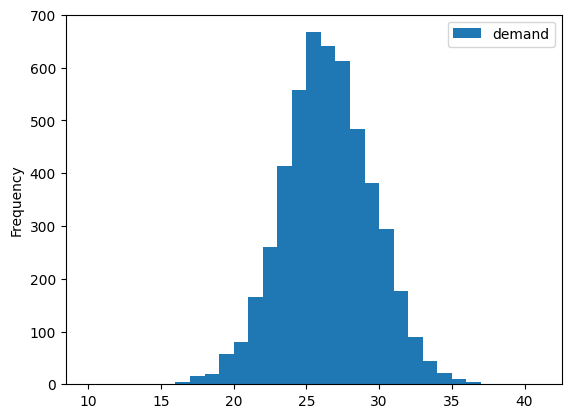

In [48]:
#Simulate the order demand (use 5000 simulation runs)
df_demand = pd.DataFrame({'demand' : np.random.normal(demand_mean,demand_sd,simulation_run).round()})
df_demand.plot.hist(bins=range(10, 42))

In [49]:
#Develop an algorithm that tests different order size levels and computes the average expected profit
df_optimize = pd.DataFrame({'order_size' : np.arange(17,35)})

In [50]:
# use a loop to try different order sizes and compute average profit
for i in np.arange(0,df_optimize.shape[0]):
    df_demand['order_size'] = df_optimize.order_size[i]
    df_demand['net_sales'] = np.minimum(df_demand.demand, df_demand.order_size)
    df_demand['revenue'] = df_demand['net_sales']*item_price
    df_demand['markdown_sales'] = np.maximum(0, df_demand.order_size - df_demand.demand)
    df_demand['markdown_revenue'] = df_demand['markdown_sales']*markdown_price
    df_demand['cost'] = df_demand.order_size*procurement_cost
    df_demand['profit'] = df_demand['revenue'] + df_demand['markdown_revenue'] - df_demand['cost']
    df_optimize.loc[i,'avg_profit'] = df_demand.profit.mean()
    df_optimize.loc[i,'sd_profit'] = df_demand.profit.std()

In [53]:
df_demand.sort_values('profit')

,demand,order_size,net_sales,revenue,markdown_sales,markdown_revenue,cost,profit
1286,14.0,34,14.0,1960.0,20.0,800.0,2380,380.0
1673,16.0,34,16.0,2240.0,18.0,720.0,2380,580.0
3343,16.0,34,16.0,2240.0,18.0,720.0,2380,580.0
555,16.0,34,16.0,2240.0,18.0,720.0,2380,580.0
4935,16.0,34,16.0,2240.0,18.0,720.0,2380,580.0
...,...,...,...,...,...,...,...,...
3692,34.0,34,34.0,4760.0,0.0,0.0,2380,2380.0
258,35.0,34,34.0,4760.0,0.0,0.0,2380,2380.0
1592,34.0,34,34.0,4760.0,0.0,0.0,2380,2380.0
4363,35.0,34,34.0,4760.0,0.0,0.0,2380,2380.0


In [55]:
df_optimize.sort_values("avg_profit", ascending=False)

,order_size,avg_profit,sd_profit
11,28,1709.96,241.005426
10,27,1709.88,212.466030
12,29,1700.38,264.428894
9,26,1697.54,179.799928
13,30,1683.18,281.920172
8,25,1672.38,145.908853
14,31,1660.10,293.075363
7,24,1633.88,113.187932
15,32,1633.48,299.445192
16,33,1605.08,302.929277


In [56]:
#Clearly state the recommended order size and profit estimates based on your results 
#- simply showing output of running code does not suffice,
# provide an interpretation and justification in your own words
recommended_order_size = int(df_optimize.order_size[df_optimize.avg_profit.idxmax()])
expected_profit = df_optimize.avg_profit.max()
print(f'Recommended order size: {recommended_order_size}, Expected profit: ${expected_profit:.2f}')

Recommended order size: 28, Expected profit: $1709.96


Optimal Inventory Management Strategy.
Based on the above result, the recommended order size for L.L Bean is 28, meaning L.L Bean should order 28 parkas in order to maximize the average profit of $1709.96 over the winter selling season.


<Axes: xlabel='order_size', ylabel='sd_profit'>

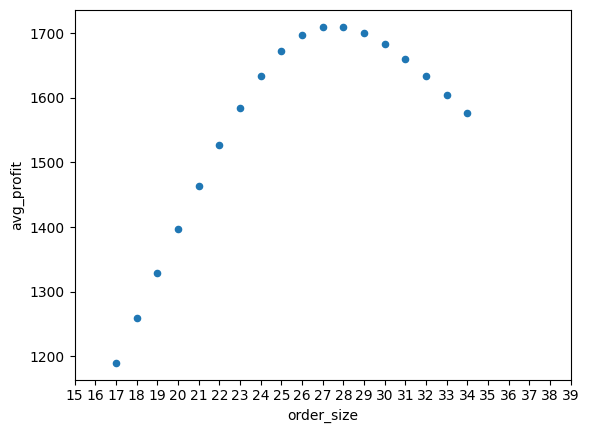

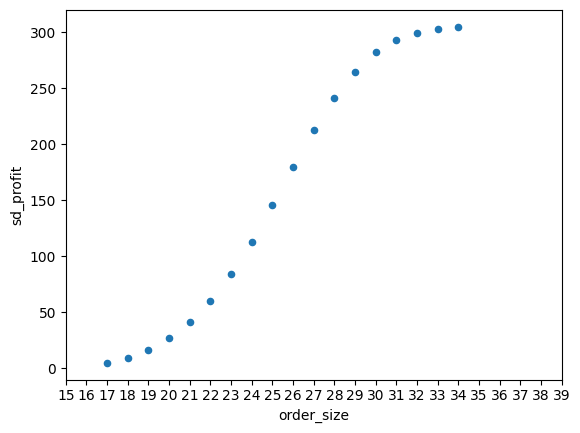

In [57]:
#Plot the relationship between avg profit vs. order level and sd of profit vs. order level
df_optimize.plot.scatter(x='order_size',y='avg_profit',xticks=range(15, 40))
df_optimize.plot.scatter(x='order_size',y='sd_profit',xticks=range(15, 40))

[Text(0, 0.5, 'Expected Profit (avg_profit)'),
 Text(0.5, 0, 'Uncertainty (sd_profit)')]

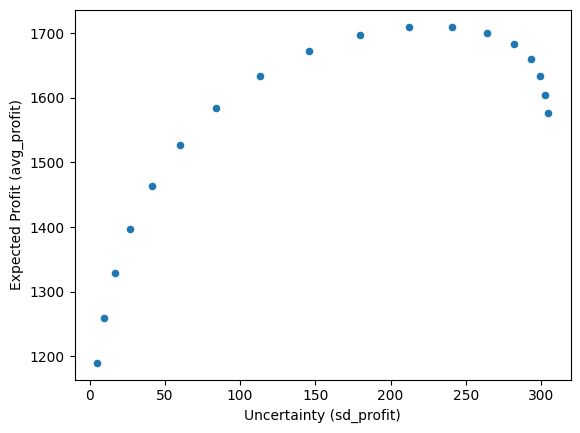

In [58]:
#Plot the profit risk in terms of the efficiency frontier (avg profit vs. sd profit)
df_optimize.plot.scatter(y='avg_profit',x='sd_profit').set(ylabel="Expected Profit (avg_profit)", xlabel="Uncertainty (sd_profit)")